Project Project 1 : Daily Market Summary

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv(r"/content/Today's Price - 2026-02-08.csv")
df.tail()


,Id,Symbol,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Total Traded Value,Previous Day Close Price,Fifty Two Week High,Fifty Two Week Low,Last Updated Price,Total Trades,Average Traded Price,Market Capitalization,Unnamed: 15
325,326,SBID2090,1078.0,1079.9,1078.0,1079.9,200.0,215885.0,1060.0,1107.0,1000.0,1079.9,3.0,1079.42,3239.70,NaN
326,327,SAGAR,2200.0,2200.0,2080.0,2080.0,24335.0,51674344.6,2160.0,2439.0,319.5,2080,489.0,2123.45,15100.80,NaN
327,328,BANDIPUR,1100.0,1135.0,1055.0,1055.0,138461.0,150596640.3,1107.0,1233.0,285.0,1055,2338.0,1087.64,29856.50,NaN
328,329,JHAPA,1408.0,1487.0,1408.0,1445.0,7452.0,10912739.0,1436.0,1749.0,293.4,1445,264.0,1464.40,5493.75,NaN
329,330,SAIL,1501.0,1511.0,1403.0,1450.0,108705.0,160248892.5,1499.4,1690.0,301.7,1450,1978.0,1474.16,23653.13,NaN


In [305]:
nums_cols = [
    "Previous Day Close Price","Close Price","Total Traded Value","Total Traded Quantity","Total Trades","Market Capitalization",
    "Open Price"]
for c in nums_cols:
  df[c] = pd.to_numeric(df[c],errors="coerce")
df.info() ### show overall details of the stock::

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        330 non-null    int64  
 1   Symbol                    330 non-null    object 
 2   Open Price                330 non-null    float64
 3   High Price                330 non-null    float64
 4   Low Price                 330 non-null    float64
 5   Close Price               330 non-null    float64
 6   Total Traded Quantity     330 non-null    float64
 7   Total Traded Value        330 non-null    float64
 8   Previous Day Close Price  330 non-null    float64
 9   Fifty Two Week High       330 non-null    float64
 10  Fifty Two Week Low        330 non-null    float64
 11  Last Updated Price        330 non-null    object 
 12  Total Trades              330 non-null    float64
 13  Average Traded Price      330 non-null    float64
 14  Market Cap

In [306]:
df["Change"] = df["Close Price"] - df["Previous Day Close Price"]
df["% Change"] = (df["Change"] / df["Previous Day Close Price"]) * 100
### For the Unchanged, Advanced and the Declined
df["Status"] = "Unchanged"
df.loc[df["Change"] > 0, "Status"] = "Advanced"
df.loc[df["Change"] < 0, "Status"] = "Declined"
traded = df[df["Total Traded Quantity"] > 0].copy()

print("\n1) Advance / Decline / Unchanged (Counts)")
print(traded["Status"].value_counts())



1) Advance / Decline / Unchanged (Counts)
Status
Declined     208
Advanced     113
Unchanged      9
Name: count, dtype: int64


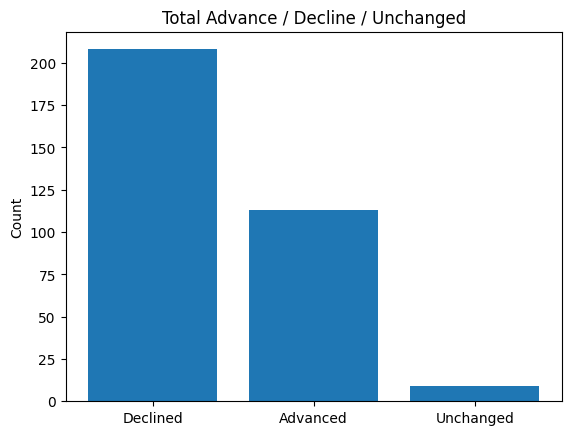

In [308]:
###  Making it Bar Graph
plt.bar(traded["Status"].value_counts().index, traded["Status"].value_counts().values)
plt.title("Total Advance / Decline / Unchanged")
plt.ylabel("Count")
plt.savefig("advance_decline_unchanged.png")

In [320]:
### Top Gaines According to the Percentagewise
top_gainers = traded.sort_values("% Change", ascending=False).head(10).reset_index()
print(top_gainers[["Symbol", "Close Price", "Change", "% Change"]])

   Symbol  Close Price  Change   % Change
0     SMH       931.70   84.70  10.000000
1    RIDI       289.90   26.30   9.977238
2    KKHC       276.80   25.10   9.972189
3     HHL       360.00   18.40   5.386417
4   JOSHI       319.00   13.70   4.487389
5    MKHC       350.00   14.40   4.290822
6   HATHY       955.00   36.00   3.917301
7  NICD88      1120.00   39.00   3.607771
8   MNMF1         9.74    0.33   3.506908
9   DORDI       296.00    9.00   3.135889


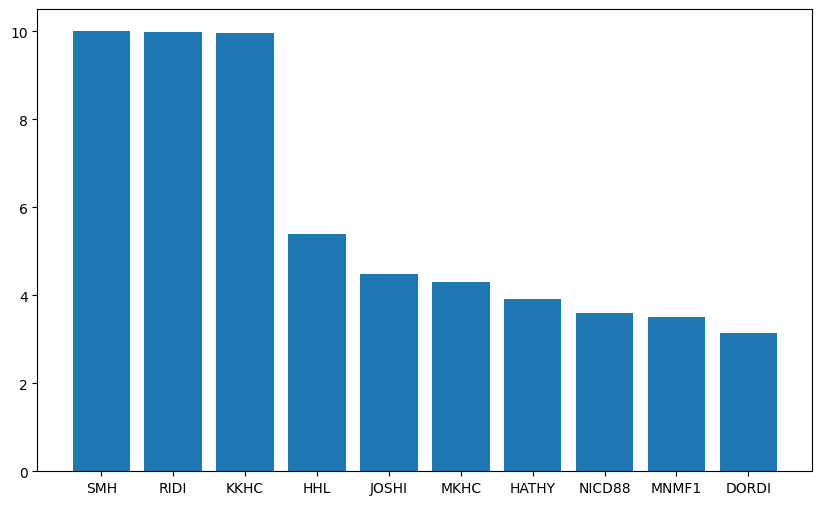

In [310]:
plt.figure(figsize=(10, 6))
plt.bar(top_gainers["Symbol"], top_gainers["% Change"])
plt.savefig("top_gainers.png")

In [311]:
### Top Losers
top_losers = (
    traded[
        (traded["% Change"] < 0) &
        (traded["% Change"] >= -10)
    ]
    .sort_values("% Change", ascending=True)
    .head(10)
    .reset_index(drop=True)
)

print(top_losers[["Symbol", "Close Price", "Change", "% Change"]])

     Symbol  Close Price  Change  % Change
0       KDL       982.00  -96.10 -8.913830
1     CORBL      1769.00 -160.00 -8.294453
2     NABBC      1689.00 -100.90 -5.637186
3    NIBSF2         9.25   -0.55 -5.612245
4     UNHPL       506.00  -25.00 -4.708098
5  BANDIPUR      1055.00  -52.00 -4.697380
6     SYPNL      2019.10  -95.90 -4.534279
7    RBBF40         9.31   -0.44 -4.512821
8  GBIMESY2         9.19   -0.41 -4.270833
9     SAGAR      2080.00  -80.00 -3.703704


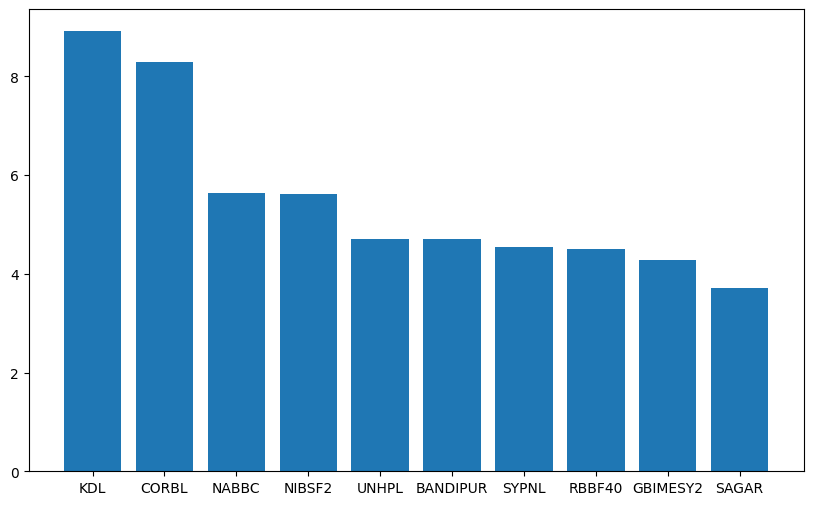

In [312]:
### Top Lossers
plt.figure(figsize=(10, 6))
plt.bar(top_losers["Symbol"], -top_losers["% Change"])
plt.savefig("top_losers.png")

In [313]:
### Top TurnOver
top_turnover = traded.sort_values("Total Traded Value", ascending=False).head(10).reset_index()
print(top_turnover[["Symbol", "Total Traded Value"]])

  Symbol  Total Traded Value
0   SMHL         560348155.8
1  AKJCL         514957432.0
2   RIDI         477492501.2
3  RADHI         439834005.3
4  SYPNL         424156406.5
5   NGPL         370750700.1
6    NRN         349587257.8
7   NRIC         259333698.1
8   NMIC         226334163.9
9   KKHC         220797065.0


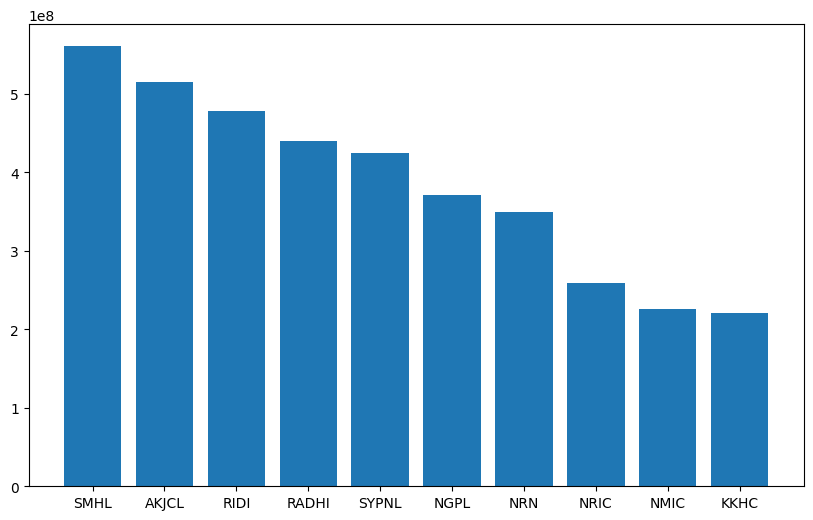

In [314]:
plt.figure(figsize=(10, 6))
plt.bar(top_turnover["Symbol"], top_turnover["Total Traded Value"])
plt.savefig("top_turnover.png")


In [315]:
### Top Volumes::
top_volume = traded.sort_values("Total Traded Quantity", ascending=False).head(10).reset_index()
print(top_volume[["Symbol", "Total Traded Quantity"]])

  Symbol  Total Traded Quantity
0   RIDI              1658725.0
1  AKJCL              1426865.0
2   SMHL              1180165.0
3   NGPL               864010.0
4   KKHC               809051.0
5   AKPL               753935.0
6   SSHL               648044.0
7  HDHPC               625420.0
8    GHL               589736.0
9  DORDI               589154.0


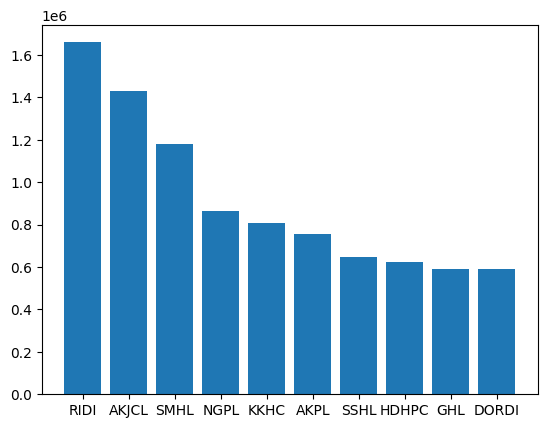

In [316]:
plt.bar(top_volume["Symbol"],top_volume["Total Traded Quantity"])
plt.savefig("top_volume.png")

In [317]:
### Top Transaction
top_transactions = traded.sort_values("Total Trades", ascending=False).head(10).reset_index()
print(top_transactions[["Symbol", "Total Trades"]])


     Symbol  Total Trades
0     SYPNL        4977.0
1      RIDI        3865.0
2      KKHC        3157.0
3      SMHL        3015.0
4     AKJCL        2580.0
5  BANDIPUR        2338.0
6      SAIL        1978.0
7       HBL        1726.0
8      SSHL        1722.0
9       HRL        1720.0


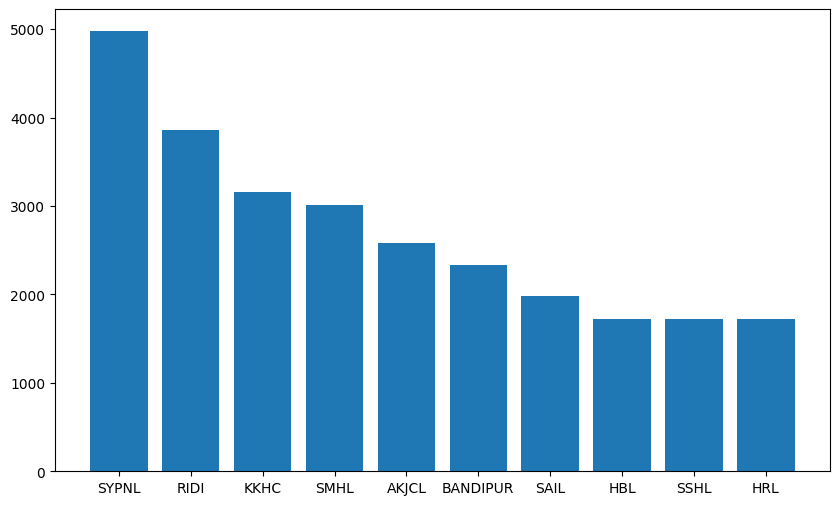

In [318]:
plt.figure(figsize=(10, 6))
plt.bar(top_transactions["Symbol"],top_transactions["Total Trades"])
plt.savefig("top_transactions.png")

In [319]:
print("Total Turnover Rs:", traded["Total Traded Value"].sum())
print("Total traded share:", traded["Total Traded Quantity"].sum())
print("Total script trade:", traded["Symbol"].nunique())
print("Total Market Capitalization:", traded["Market Capitalization"].sum())


Total Turnover Rs: 11659612437.61
Total traded share: 26237150.1
Total script trade: 330
Total Market Capitalization: 4689570.49
